In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

In [4]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
df = pd.read_csv("/content/drive/MyDrive/invoice_project/cleaned_invoice_data.csv")

In [6]:
df.head()

,invoice_id,date,vendor,item,amount,tax,total,filename,is_fraud
0,INVO297,1979-07-29,Hartman Ltd,Tax Filing,642.85,115.71,758.56,invoice_0.pdf,0
1,INV4575,2019-08-31,Holland LLC,Customer Support Plan,201.59,36.29,237.88,invoice_1.pdf,0
2,INV8579,2017-02-20,White PLC,Laptop,159.70,28.75,188.45,invoice_3.pdf,0
3,INV5127,1982-07-24,"Thompson, Harris and Williams",Prototype Development,584.22,105.16,689.38,invoice_4.pdf,0
4,INV9890,2023-02-16,"Roberts, Colon and Chambers",Mobile App Development,762.25,-137.20,899.45,invoice_2.pdf,1


In [7]:
summary = df.describe(include='all')

In [8]:
summary

,invoice_id,date,vendor,item,amount,tax,total,filename,is_fraud
count,100,100,100,100,100.000000,100.000000,100.000000,100,100.000000
unique,100,100,98,42,NaN,NaN,NaN,100,NaN
top,INVO297,1979-07-29,Item: Mouse,Pen Drive,NaN,NaN,NaN,invoice_0.pdf,NaN
freq,1,1,2,6,NaN,NaN,NaN,1,NaN
mean,NaN,NaN,NaN,NaN,788.428100,89.543500,890.465400,NaN,0.280000
std,NaN,NaN,NaN,NaN,920.277482,72.975501,948.727309,NaN,0.451261
min,NaN,NaN,NaN,NaN,110.980000,-179.680000,130.960000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,302.190000,39.877500,356.582500,NaN,0.000000
50%,NaN,NaN,NaN,NaN,651.205000,95.665000,765.085000,NaN,0.000000
75%,NaN,NaN,NaN,NaN,846.165000,149.310000,998.477500,NaN,1.000000


In [9]:
fraud_counts = df['is_fraud'].value_counts().rename(index={0: "Not Fraud", 1: "Fraud"})

In [10]:
corr = df[['amount', 'tax', 'total', 'is_fraud']].corr()

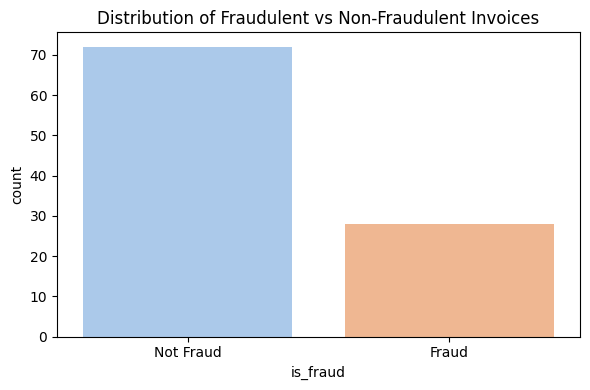

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x="is_fraud", data=df, palette="pastel")
plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.title("Distribution of Fraudulent vs Non-Fraudulent Invoices")
plt.tight_layout()
plt.show()

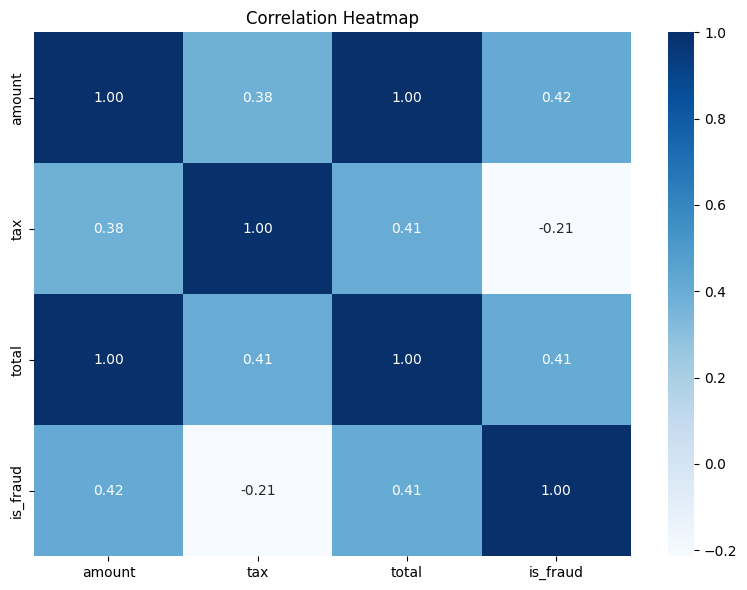

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

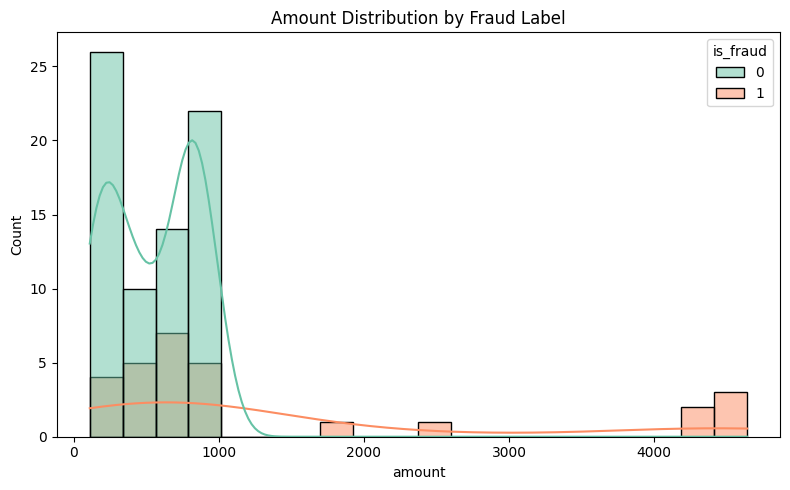

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="amount", hue="is_fraud", kde=True, palette="Set2", bins=20)
plt.title("Amount Distribution by Fraud Label")
plt.tight_layout()
plt.show()

In [17]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [18]:
df['invoice_year'] = df['date'].dt.year
df['invoice_month'] = df['date'].dt.month
df['invoice_day'] = df['date'].dt.day
df['invoice_weekday'] = df['date'].dt.weekday

In [19]:
df_model = df.drop(columns=['invoice_id', 'date', 'vendor', 'item', 'filename'])

In [20]:
df_model = df_model.dropna()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [23]:
X = df_model.drop(columns=['is_fraud'])
y = df_model['is_fraud']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
y_pred = clf.predict(X_test)

In [27]:
y_prob = clf.predict_proba(X_test)[:, 1]

In [28]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.50      0.67         6

    accuracy                           0.85        20
   macro avg       0.91      0.75      0.78        20
weighted avg       0.88      0.85      0.83        20



In [29]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[14  0]
 [ 3  3]]


In [30]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

ROC-AUC Score: 0.6726190476190476


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
log_model = LogisticRegression()

In [36]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [37]:
log_pred = log_model.predict(X_test_scaled)

In [39]:
log_prob = log_model.predict_proba(X_test_scaled)[:, 1]

In [40]:
log_results = {
    "model": "Logistic Regression",
    "report": classification_report(y_test, log_pred, output_dict=True),
    "conf_matrix": confusion_matrix(y_test, log_pred),
    "roc_auc": roc_auc_score(y_test, log_prob)
}

In [41]:
log_results

{'model': 'Logistic Regression',
 'report': {'0': {'precision': 0.7647058823529411,
   'recall': 0.9285714285714286,
   'f1-score': 0.8387096774193549,
   'support': 14.0},
  '1': {'precision': 0.6666666666666666,
   'recall': 0.3333333333333333,
   'f1-score': 0.4444444444444444,
   'support': 6.0},
  'accuracy': 0.75,
  'macro avg': {'precision': 0.7156862745098038,
   'recall': 0.6309523809523809,
   'f1-score': 0.6415770609318996,
   'support': 20.0},
  'weighted avg': {'precision': 0.7352941176470588,
   'recall': 0.75,
   'f1-score': 0.7204301075268817,
   'support': 20.0}},
 'conf_matrix': array([[13,  1],
        [ 4,  2]]),
 'roc_auc': np.float64(0.6666666666666666)}

In [42]:
from xgboost import XGBClassifier

In [43]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [44]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [45]:
xgb_pred = xgb_model.predict(X_test)

In [46]:
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

In [47]:
xgb_results = {
    "model": "XGBoost",
    "report": classification_report(y_test, xgb_pred, output_dict=True),
    "conf_matrix": confusion_matrix(y_test, xgb_pred),
    "roc_auc": roc_auc_score(y_test, xgb_prob)
}

In [48]:
xgb_results

{'model': 'XGBoost',
 'report': {'0': {'precision': 0.8571428571428571,
   'recall': 0.8571428571428571,
   'f1-score': 0.8571428571428571,
   'support': 14.0},
  '1': {'precision': 0.6666666666666666,
   'recall': 0.6666666666666666,
   'f1-score': 0.6666666666666666,
   'support': 6.0},
  'accuracy': 0.8,
  'macro avg': {'precision': 0.7619047619047619,
   'recall': 0.7619047619047619,
   'f1-score': 0.7619047619047619,
   'support': 20.0},
  'weighted avg': {'precision': 0.8,
   'recall': 0.8,
   'f1-score': 0.8,
   'support': 20.0}},
 'conf_matrix': array([[12,  2],
        [ 2,  4]]),
 'roc_auc': np.float64(0.7261904761904762)}

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [2, 3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
}

In [52]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [54]:
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist,
    n_iter=20, scoring='roc_auc', cv=3, random_state=42, n_jobs=-1
)

In [55]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc')

In [56]:
best_model = random_search.best_estimator_

In [58]:
y_pred = best_model.predict(X_test)

In [59]:
y_prob = best_model.predict_proba(X_test)[:, 1]

In [60]:
results = {
    "best_params": random_search.best_params_,
    "classification_report": classification_report(y_test, y_pred, output_dict=True),
    "conf_matrix": confusion_matrix(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_prob)
}

In [61]:
results

{'best_params': {'subsample': 0.6,
  'n_estimators': 150,
  'max_depth': 3,
  'learning_rate': 0.2,
  'gamma': 0,
  'colsample_bytree': 1.0},
 'classification_report': {'0': {'precision': 0.8571428571428571,
   'recall': 0.8571428571428571,
   'f1-score': 0.8571428571428571,
   'support': 14.0},
  '1': {'precision': 0.6666666666666666,
   'recall': 0.6666666666666666,
   'f1-score': 0.6666666666666666,
   'support': 6.0},
  'accuracy': 0.8,
  'macro avg': {'precision': 0.7619047619047619,
   'recall': 0.7619047619047619,
   'f1-score': 0.7619047619047619,
   'support': 20.0},
  'weighted avg': {'precision': 0.8,
   'recall': 0.8,
   'f1-score': 0.8,
   'support': 20.0}},
 'conf_matrix': array([[12,  2],
        [ 2,  4]]),
 'roc_auc': np.float64(0.7142857142857143)}

In [62]:
import joblib

In [63]:
model_path = "/content/drive/MyDrive/invoice_project/tuned_xgboost_invoice_fraud_model.pkl"

In [64]:
joblib.dump(best_model, model_path)

['/content/drive/MyDrive/invoice_project/tuned_xgboost_invoice_fraud_model.pkl']